### Unsupervised Image Classification using Affinity Propagation

Unsupervised Image classification is a process of classify images which are not labeled. The goal of unsupervised Image classification is to form clusters of images based on similar properties so that images under a cluster are semantically identical

In [1]:
import pandas as pd
from keras.models import Model
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import cifar10
from tensorflow.keras import regularizers, optimizers
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
Y_train.shape

(50000, 1)

In [5]:
#CNN dataset divide for size 20000 from x_train & y_train
cnn_x_train, af_x_train, cnn_y_train, af_y_train = train_test_split(X_train,Y_train, train_size = 20000, 
                                                                    random_state = 10, stratify = Y_train)

In [6]:
cnn_x_train.shape

(20000, 32, 32, 3)

In [7]:
af_x_train.shape

(30000, 32, 32, 3)

In [8]:
cnn_y_train.shape

(20000, 1)

In [9]:
af_y_train.shape

(30000, 1)

In [10]:
#Now dividing af_x_train & af_y_train into train and test
afx_train, afx_test, afy_train, afy_test = train_test_split(af_x_train, af_y_train, train_size = 20000,
                                                            random_state = 10, stratify = af_y_train)

In [11]:
afx_train.shape

(20000, 32, 32, 3)

In [12]:
afy_train.shape

(20000, 1)

<BarContainer object of 10 artists>

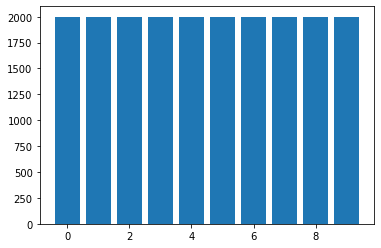

In [13]:
classes =  np.unique(afy_train)
cls, counts = np.unique(afy_train, return_counts=True)
plt.bar(classes, counts)

In [14]:
x_train = af_x_train.astype('float32') / 255
x_test = X_test.astype('float32') / 255
x_train = np.reshape(x_train, (len(af_x_train),32,32,3)) 
x_test = np.reshape(x_test, (len(x_test),32,32,3)) 

In [15]:
noise_factor = 0.25
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

In [16]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (2, 2), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 8)          0

In [18]:
out = model.fit(x_train_noisy, x_train, epochs=50, batch_size=16, shuffle=True,
          validation_data=(x_test_noisy, x_test))

Epoch 1/50
1875/1875 [==============================] - 18s 8ms/step - loss: 0.0253 - accuracy: 0.4853 - val_loss: 0.0182 - val_accuracy: 0.5754
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0173 - accuracy: 0.6035 - val_loss: 0.0165 - val_accuracy: 0.5980
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0162 - accuracy: 0.6128 - val_loss: 0.0159 - val_accuracy: 0.6324
Epoch 4/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0157 - accuracy: 0.6162 - val_loss: 0.0154 - val_accuracy: 0.6171
Epoch 5/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0153 - accuracy: 0.6192 - val_loss: 0.0150 - val_accuracy: 0.6405
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0150 - accuracy: 0.6212 - val_loss: 0.0149 - val_accuracy: 0.6322
Epoch 7/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0148 - accuracy: 0.6233 - val_loss: 0.0145 - val_ac

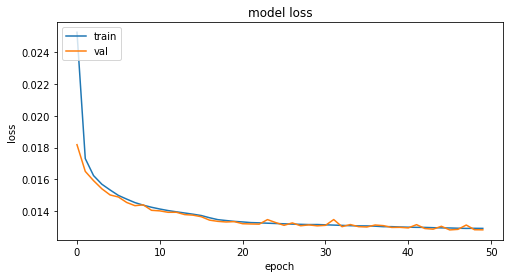

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(out.history['loss'])
plt.plot(out.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0128 - accuracy: 0.6677


[0.012825208716094494, 0.6676548719406128]

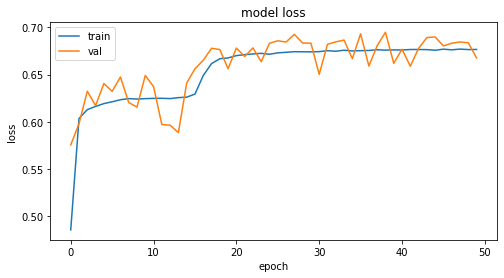

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(out.history['accuracy'])
plt.plot(out.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
new = X_train.astype('float32') / 255
new = np.reshape(new, (len(X_train),32,32,3)) 

In [23]:
no_noise_img = model.predict(new)

1563/1563 [==============================] - 6s 3ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


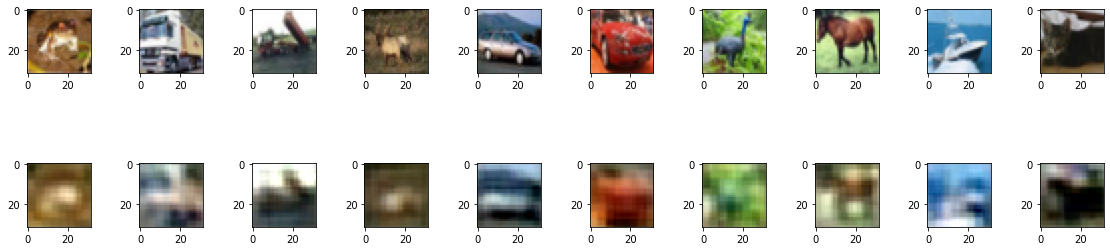

In [24]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(new[i])
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i])

plt.show()

In [25]:
n_class = 10
y_train = np_utils.to_categorical(cnn_y_train,n_class)
Y_test = np_utils.to_categorical(Y_test,n_class)
#y_train = cnn_y_train

In [26]:
Y_test.shape

(10000, 10)

In [27]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=cnn_x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(n_class, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                      

In [28]:
def gray(image):
    image = tensorflow.image.rgb_to_grayscale(image)
    return image

In [29]:
def acc_mat(x,y):
    for i in np.unique(y):
        mask = (y == i).reshape(x.shape[0])
        X = x[mask]
        test_feat = af.predict(X)
        cls, counts = np.unique(test_feat, return_counts=True)
        acc = round(( max(counts) / ( y.shape[0] / 10 )) * 100, 2)
        print('For Label: ',i,' F1-score is :', acc,'%' )
        

In [30]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
#    preprocessing_function=gray,
#    horizontal_flip=True,
#    vertical_flip=True,
#    fill_mode = 'reflect'
    )
datagen.fit(cnn_x_train)

In [31]:
#training
batch_size = 64
epochs=25
opt_rms = optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
mod1 = model.fit(datagen.flow(cnn_x_train, y_train, batch_size=batch_size),steps_per_epoch=cnn_x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(X_test,Y_test))

opt_rms = optimizers.RMSprop(learning_rate=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
mod2 = model.fit(datagen.flow(cnn_x_train, y_train, batch_size=batch_size),steps_per_epoch=cnn_x_train.shape[0] // batch_size,epochs= 15,verbose=1,validation_data=(X_test,Y_test))

opt_rms = optimizers.RMSprop(learning_rate=0.0003,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
mod3 = model.fit(datagen.flow(cnn_x_train, y_train, batch_size=batch_size),steps_per_epoch=cnn_x_train.shape[0] // batch_size,epochs= 10,verbose=1,validation_data=(X_test,Y_test))
model.save_weights('cnn_wgt.h5')

Epoch 1/25
312/312 [==============================] - 21s 61ms/step - loss: 2.1618 - accuracy: 0.3612 - val_loss: 2.4963 - val_accuracy: 0.3467
Epoch 2/25
312/312 [==============================] - 17s 55ms/step - loss: 1.6715 - accuracy: 0.4969 - val_loss: 1.8948 - val_accuracy: 0.4618
Epoch 3/25
312/312 [==============================] - 16s 51ms/step - loss: 1.4288 - accuracy: 0.5647 - val_loss: 1.2236 - val_accuracy: 0.6180
Epoch 4/25
312/312 [==============================] - 16s 53ms/step - loss: 1.2818 - accuracy: 0.5979 - val_loss: 1.4587 - val_accuracy: 0.5771
Epoch 5/25
312/312 [==============================] - 17s 53ms/step - loss: 1.1460 - accuracy: 0.6397 - val_loss: 1.3743 - val_accuracy: 0.5669
Epoch 6/25
312/312 [==============================] - 18s 57ms/step - loss: 1.0538 - accuracy: 0.6647 - val_loss: 1.1521 - val_accuracy: 0.6559
Epoch 7/25
312/312 [==============================] - 17s 55ms/step - loss: 0.9922 - accuracy: 0.6906 - val_loss: 1.0761 - val_accuracy:

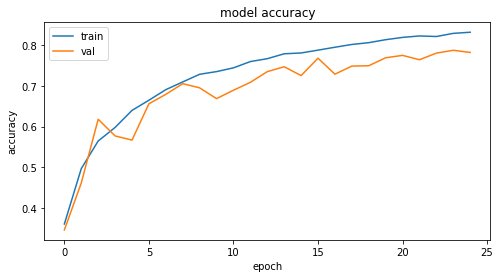

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(mod1.history['accuracy'])
plt.plot(mod1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

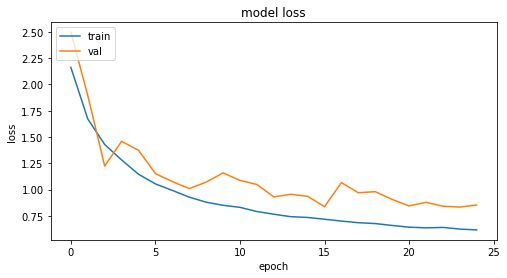

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(mod1.history['loss'])
plt.plot(mod1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

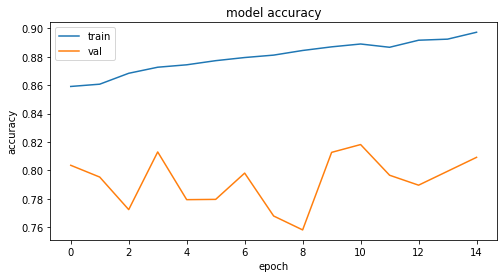

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(mod2.history['accuracy'])
plt.plot(mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

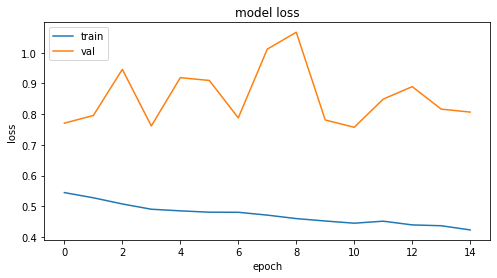

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(mod2.history['loss'])
plt.plot(mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

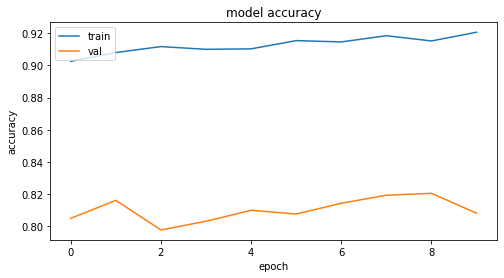

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(mod3.history['accuracy'])
plt.plot(mod3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

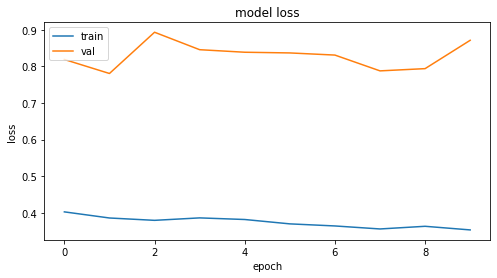

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(mod3.history['loss'])
plt.plot(mod3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [38]:
score = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=1)
print('Result: %.3f loss: %.3f' % (score[1]*100,score[0]))

157/157 [==============================] - 1s 8ms/step - loss: 0.8717 - accuracy: 0.8080
Result: 80.800 loss: 0.872


In [39]:
output = model.layers[-2].output

In [40]:
m2 = Model(model.input, output)
m2.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
m2.load_weights('cnn_wgt.h5', by_name = True)

for layer in m2.layers:
    layer.trainable = False
    
m2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                             

In [41]:
temp = datagen.flow(
            x = afx_train,
            seed = 27,
            batch_size = batch_size)

In [66]:
feat = m2.predict(temp)

313/313 [==============================] - 12s 38ms/step


In [43]:
feat.shape

(20000, 2048)

In [57]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [63]:
af = AffinityPropagation(preference = -5000, damping = 0.9, convergence_iter = 15, copy = False, 
                         verbose = True, random_state = 1).fit(feat)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
  
n_clusters_ = len(cluster_centers_indices)

Converged after 55 iterations.


In [61]:
n_clusters_

10

<BarContainer object of 10 artists>

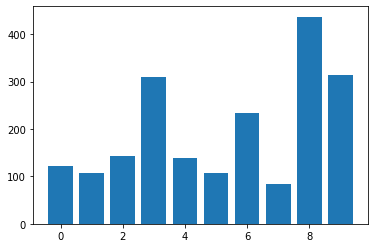

In [62]:
classes =  np.unique(labels)
cls, counts = np.unique(labels, return_counts=True)
plt.bar(classes, counts)

In [64]:
test = m2.predict(af_x_train)

938/938 [==============================] - 3s 3ms/step


In [65]:
acc_mat(test, af_y_train)

For Label:  0  F1-score is : 25.53 %
For Label:  1  F1-score is : 63.07 %
For Label:  2  F1-score is : 38.5 %
For Label:  3  F1-score is : 45.4 %
For Label:  4  F1-score is : 69.87 %
For Label:  5  F1-score is : 47.23 %
For Label:  6  F1-score is : 62.5 %
For Label:  7  F1-score is : 39.27 %
For Label:  8  F1-score is : 35.6 %
For Label:  9  F1-score is : 51.33 %


In [68]:
trainx_feat, testx_feat, trainy, testy = train_test_split(feat, cnn_y_train, train_size = 5000,
                                                            random_state = 10, stratify = cnn_y_train)

In [69]:
from sklearn.cluster import KMeans

In [70]:
kmeans = KMeans(n_clusters=10,max_iter=200)
k = kmeans.fit(feat,trainy)

In [71]:
out = k.predict(test)

<BarContainer object of 10 artists>

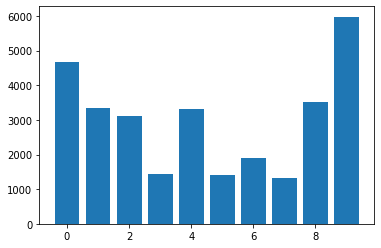

In [72]:
classes =  np.unique(out)
cls, counts = np.unique(out, return_counts=True)
plt.bar(classes, counts)